# Test for ML Final Project

In [1]:
# test multiple correspondence analysis
# think of it as PCA for categorical variables

pip install --user mca

SyntaxError: invalid syntax (338126946.py, line 4)

In [2]:
# import libraries

import pandas as pd
import numpy as np
from mca import MCA 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


mca reference https://pypi.org/project/mca/

In [3]:
# read in data

df = pd.read_csv('llm_source_attribution_data.csv')

df_drop = df.drop(['Question','Attributed Sources','Number of Sources','Question Number', 'Notes While Testing', 'Model Version', 'Date', 'Ads Included in Response', 'Multi-modal Response'], axis=1)

display(df_drop)

,Question Category,LLM,Explicit Attribution,Are All Source Links Functional
0,General Knowledge,gemini,explicit_attribution,all_links_functional
1,History,gemini,explicit_attribution,all_links_functional
2,Entertainment,gemini,explicit_attribution,all_links_functional
3,Politics,gemini,explicit_attribution,all_links_functional
4,Entertainment,gemini,explicit_attribution,all_links_functional
...,...,...,...,...
595,Literature,chatGPT,explicit_attribution,all_links_functional
596,Economics & Commerce,chatGPT,explicit_attribution,all_links_functional
597,History,chatGPT,explicit_attribution,all_links_functional
598,Entertainment,chatGPT,explicit_attribution,all_links_functional


In [5]:

# Ensure all categorical columns are of type 'category'
for col in df_drop.columns:
    df_drop[col] = df_drop[col].astype('category')
    
# Convert categorical variables (one-hot encoding)
data_hot = pd.get_dummies(df_drop, drop_first=True)

In [6]:
data_hot.head()


,Question Category_Entertainment,Question Category_Food & Cooking,Question Category_General Knowledge,Question Category_Geography,Question Category_History,Question Category_Literature,Question Category_Philosophy,Question Category_Politics,Question Category_Science & Technology,Question Category_Sports,LLM_copilot,LLM_gemini,LLM_grok,LLM_llama,LLM_perplexity,Explicit Attribution_no_ads,Explicit Attribution_no_attribution,Are All Source Links Functional_no_links_functional,Are All Source Links Functional_some_links_functional
0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [7]:
# Fit MCA on the data
mca_model = MCA(data_hot, ncols=data_hot.shape[1])


In [8]:
# Get the reduced space for rows (individuals) and columns (categories)
# rows = mca_model.fs_r
# cols = mca_model.fs_c

# Get the reduced space for rows (individuals) and columns (categories)
rows = mca_model.fs_r()  # Call the method to get row coordinates
cols = mca_model.fs_c()  # Call the method to get column coordinates

In [9]:
rows.shape, cols.shape

((600, 13), (19, 13))

In [12]:
mca_result = MCA(data_hot)


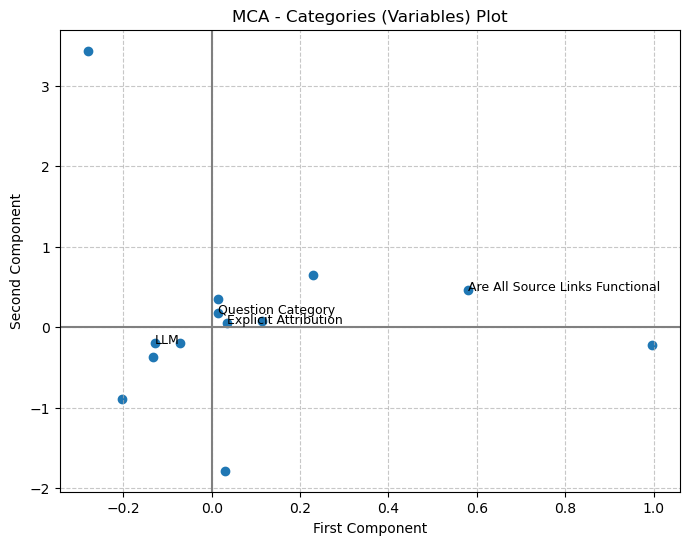

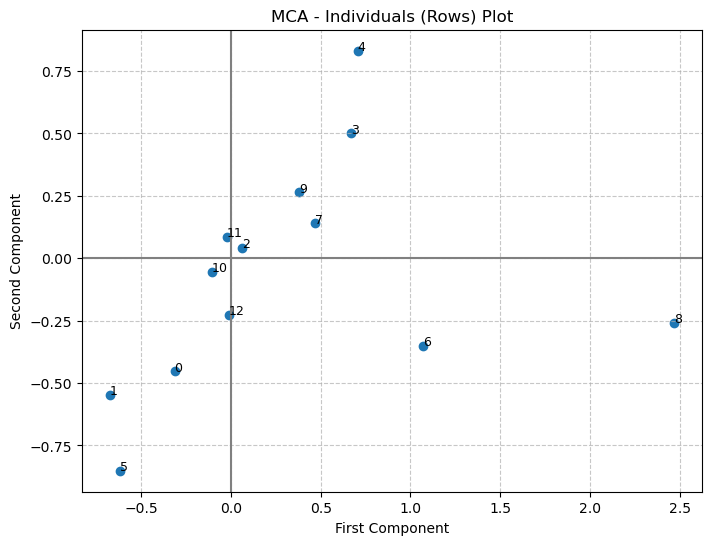

In [13]:
# Plot the variables (categories) on the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(cols[0], cols[1])

# Ensure the labels correspond to the columns in the MCA result, not the dummy variables
category_labels = list(df_drop.columns)  # Use the original categorical column names

# Add labels for each category, but make sure you don’t exceed the number of categories in the MCA result
for i, label in enumerate(category_labels):
    if i < len(cols[0]):  # Make sure we do not go out of bounds
        plt.text(cols[0][i], cols[1][i], label, fontsize=9)

plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("MCA - Categories (Variables) Plot")
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot the individuals (rows) on the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(rows[0], rows[1])

# Optionally, label the points with their row indices
for i, row in enumerate(rows.T):
    plt.text(row[0], row[1], str(i), fontsize=9)

plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("MCA - Individuals (Rows) Plot")
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()